# Rainfall Prediction

### Introduction

##### Problem Statement

Rainfall prediction poses a significant challenge with profound societal implications. Accurate forecasting can mitigate human and financial losses. This study conducts a series of experiments employing common machine learning techniques to develop models for predicting next-day rainfall in major Australian cities. Utilizing the "Rain in Australia" dataset sourced from Kaggle, encompassing a decade of historical rainfall data in CSV format, the research focuses on implementing Random Forest in real-world scenarios. Through comprehensive data exploration and analysis, the study aims to forecast rainfall occurrences for different regions across Australia. The target variable, RainTomorrow, signifies whether it will rain the following day, classified as Yes or No.

##### Data Import and Exploration

In [1]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans


The dataset comprises weather observations collected over a span of time in various Australian cities, encompassing diverse meteorological parameters. Date is formatted as yyyy-mm-dd, while Location denotes the city of observation. Key features include MinTemp and MaxTemp (minimum and maximum daily temperatures), 
Temp9am and Temp3pm (morning and afternoon temperatures), 
Rainfall (measured in mm), 
Evaporation (measured in mm), 
Sunshine (duration of bright sunshine in hours), 
WindGustDir/Speed, WindDir9am/3pm, and 
WindSpeed9am/3pm (wind direction and speed), 
Humidity9am/3pm (humidity in percent), 
Pressure9am/3pm (atmospheric pressure in hectopascals), 
Cloud9am/3pm (cloud level as fraction of sky obscured), 
RainToday (rainfall occurrence today), and 
RainTomorrow (target variable indicating rain forecast for the following day).


In [2]:
# Importing dataset
dataset = pd.read_csv("weatherAUS.csv")
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


The dataset comprises 145,460 entries distributed across 23 columns, each characterized by varying data types. Upon inspection, it was observed that among the 23 columns, 16 are numerical (dtype=float64) while the remaining 7 are categorical (dtype=object). Additionally, upon examining the dataset using the df.info() function, it was noted that null values are present within the dataset.

In [3]:
dataset.shape

(145460, 23)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Display the first few rows of the dataset
print(dataset.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [6]:
# Summary statistics of numerical variables
print(dataset.describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

##### Data Preprocessing

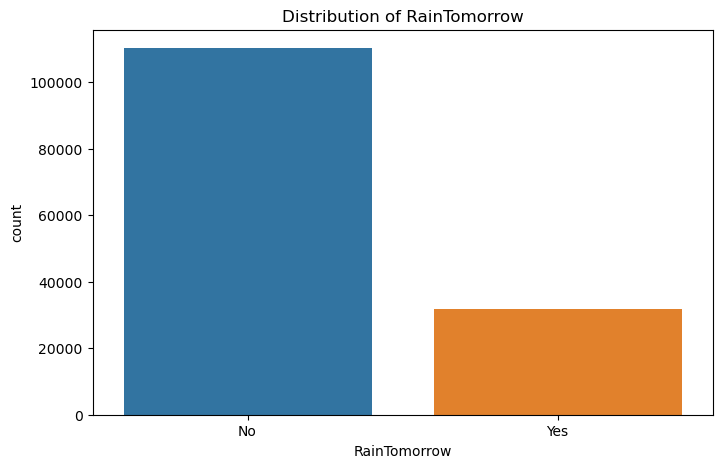

In [7]:
# Visualize the distribution of the target variable (RainTomorrow)
plt.figure(figsize=(8, 5))
sns.countplot(x='RainTomorrow', data=dataset)
plt.title('Distribution of RainTomorrow')
plt.show()

In [8]:
# Handling class imbalance by oversampling the minority class
from sklearn.utils import resample
no = dataset[dataset.RainTomorrow == 'No']
yes = dataset[dataset.RainTomorrow == 'Yes']
balanced_dataset = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled_dataset = pd.concat([no, balanced_dataset])

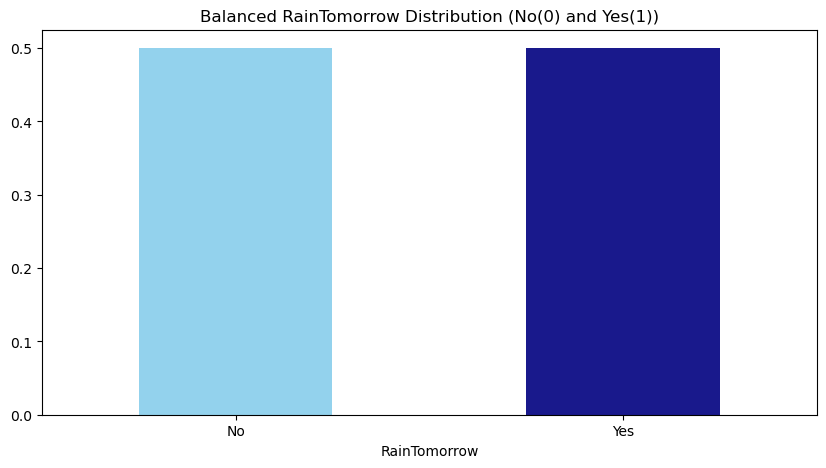

In [9]:
fig = plt.figure(figsize = (10,5))
oversampled_dataset.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Balanced RainTomorrow Distribution (No(0) and Yes(1))')
plt.show()

In [10]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
# Copying the dataset for preprocessing
dataset1 = dataset.copy()

In [12]:
# Replace missing values for numerical columns with median, for object columns with mode

def replace_numerical(dataset1):
    for col in dataset1.select_dtypes(['int', 'float']):
        dataset1[col] = dataset1[col].fillna(dataset1[col].median())
    return dataset1

# Replace object columns with mode
def replace_object(dataset1):
    for col in dataset1.select_dtypes('object'):
        dataset1[col] = dataset1[col].fillna(method='ffill')
    return dataset1

In [13]:
dataset1 = replace_numerical(dataset1)
dataset1 = replace_object(dataset1)

In [14]:
dataset1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
# Additional feature engineering: extracting year, month, and rainfall from the 'Date' column
dataset1['Date'] = pd.to_datetime(dataset1['Date'], errors='coerce')
rainfall =[dataset1['Date'].dt.year, dataset1['Date'].dt.month, dataset1['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rainfall_dataset = pd.concat(rainfall, axis=1, keys=headers)


##### Data Visualization

<Figure size 1000x800 with 0 Axes>

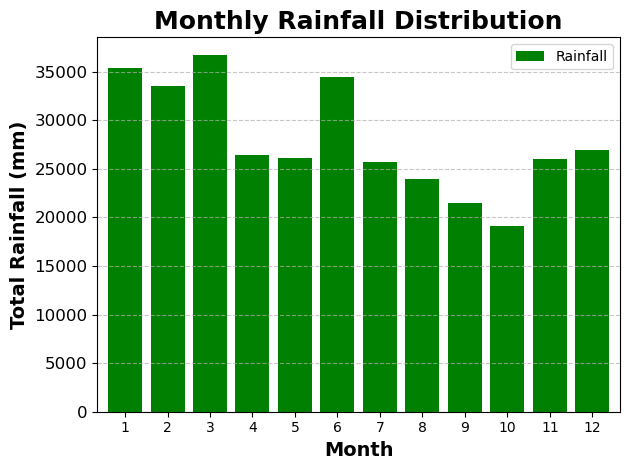

In [16]:
# Visualizing rainfall distribution in each month
plt.figure(figsize=(10,8))
monthly_rainfall = rainfall_dataset.groupby('Month').agg({'Rainfall':'sum'})
monthly_rainfall.plot(kind='bar', color='green', width=0.8) 
plt.title('Monthly Rainfall Distribution', fontsize=18, fontweight='bold') 
plt.xlabel('Month', fontsize=14, fontweight='bold') 
plt.ylabel('Total Rainfall (mm)', fontsize=14, fontweight='bold')  
plt.xticks(rotation=0) 
plt.yticks(fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout() 
plt.show()


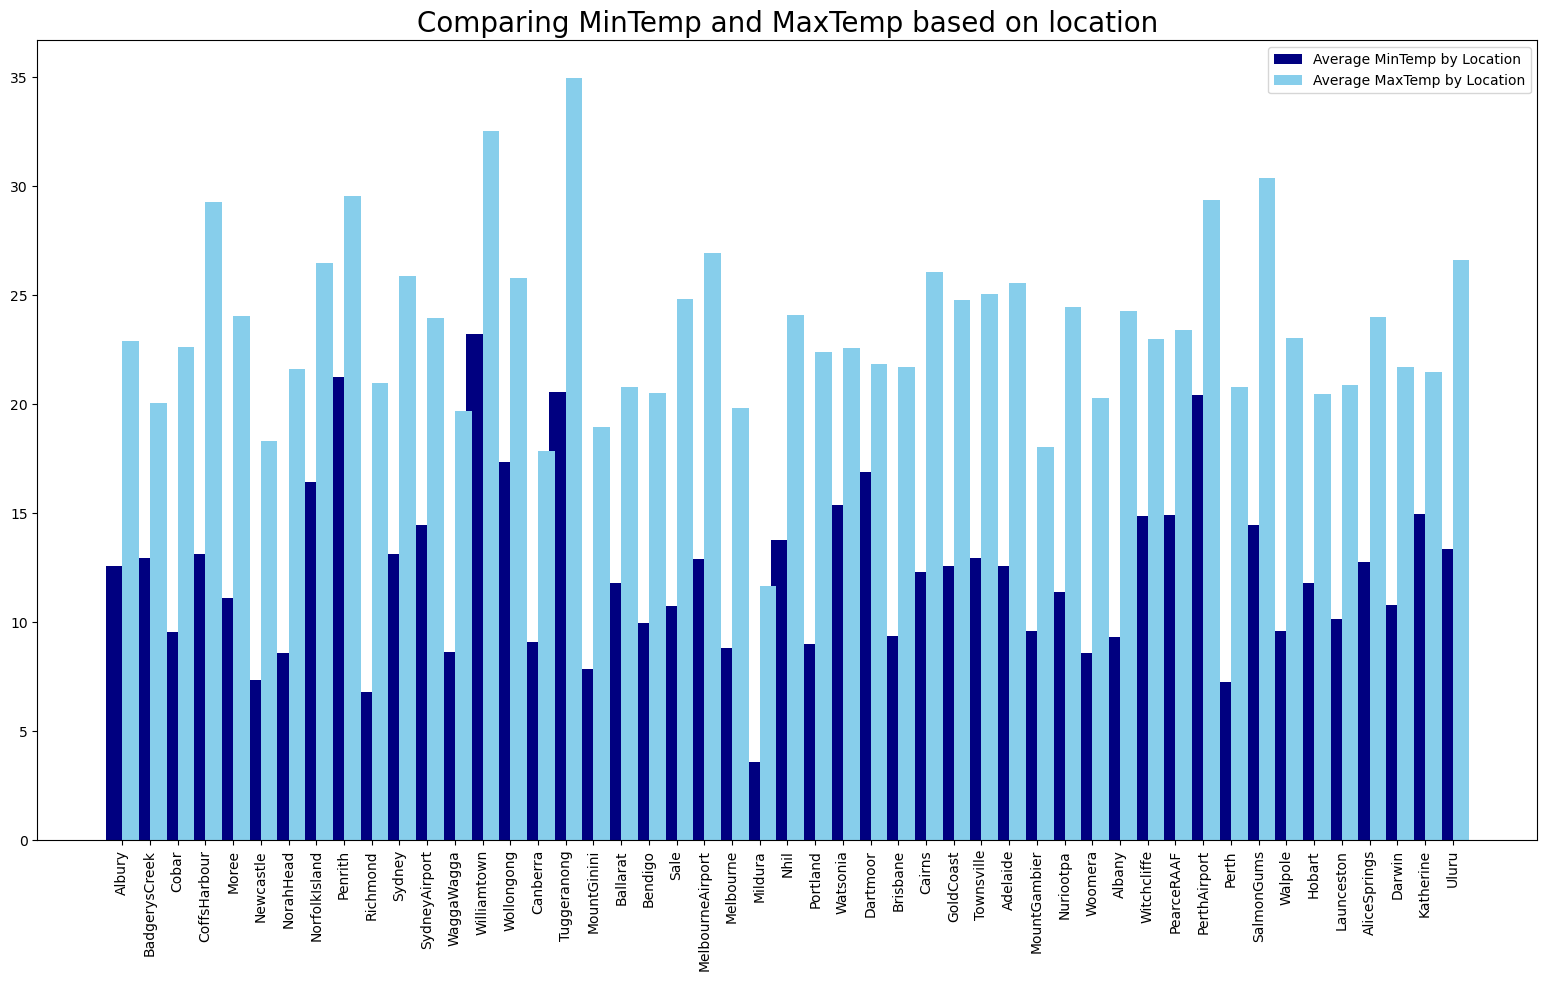

In [17]:
# Comparing average MinTemp and MaxTemp based on location
average_min_temp  = dataset.groupby('Location').agg({'MinTemp':'mean'})
average_max_temp  = dataset.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (15,8)
num_locations  = dataset['Location'].nunique()
x_values = np.arange(num_locations)
locations  = dataset['Location'].unique()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
w = 0.6
ax.bar(x_values-w/2, average_min_temp[:]['MinTemp'], label='Average MinTemp by Location', color='navy', width=w)
ax.bar(x_values+w/2, average_max_temp[:]['MaxTemp'], label='Average MaxTemp by Location', color='skyblue', width=w)
ax.set_xticks(x_values)
ax.set_xticklabels(locations, rotation=90)
plt.title("Comparing MinTemp and MaxTemp based on location", fontsize=20)
plt.legend(fontsize=10)

Text(0.5, 1.0, 'Rain Today - Rain Tomorrow')

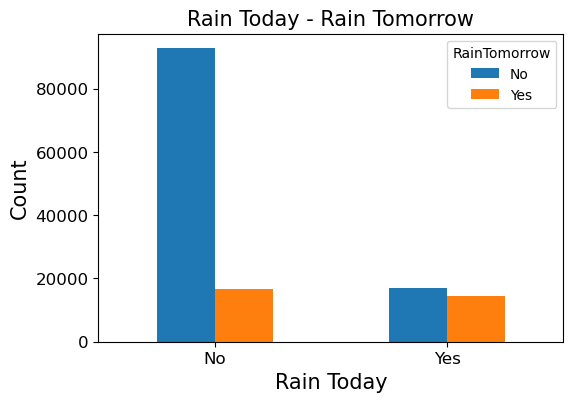

In [18]:
# Visualizing the relationship between 'RainToday' and 'RainTomorrow'
Today_Tomorrow_plot = pd.crosstab(dataset['RainToday'], dataset['RainTomorrow'])
plt.rcParams["figure.figsize"] = (6,4)
Today_Tomorrow_plot.plot(kind='bar',stacked=False)
plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rain Today - Rain Tomorrow', fontsize=15)

### Method

##### Random Forest

andom Forest is a versatile and widely used ensemble learning technique in machine learning, known for its robustness and high predictive accuracy. It operates by constructing multiple decision trees during the training phase and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees. Each decision tree is trained on a random subset of the training data and a random subset of the features, which introduces diversity among the trees and helps reduce overfitting. During prediction, each tree in the forest independently produces its own output, and the final prediction is determined by aggregating the outputs of all trees, typically through a majority vote for classification or averaging for regression. Random Forests are capable of handling large datasets with high dimensionality and are less prone to overfitting compared to individual decision trees. They are widely used across various domains for tasks such as classification, regression, feature importance ranking, and outlier detection, making them a popular choice for both beginners and experienced practitioners in machine learning.

In our code below, the Random Forest algorithm is employed to construct a predictive model for classifying whether it will rain tomorrow based on various weather-related features. Initially, the dataset undergoes preprocessing steps, including handling missing values and feature scaling. Relevant features are selected, and the data is split into training and testing sets. The RandomForestClassifier is then instantiated and trained on the training data. Following training, the model's performance is evaluated using the testing data, computing accuracy scores and generating a classification report to assess its predictive capabilities. Finally, predictions are made on both training and testing sets to further analyze the model's behavior and effectiveness in predicting rainfall. Overall, the Random Forest model serves as a robust and versatile tool for weather prediction, leveraging ensemble learning techniques to provide accurate forecasts based on diverse sets of weather parameters.

Here we are splitting the dataset into features (X) and the target variable (Y). For features (X), it selects specific columns from the dataset using integer-based indexing, including columns indexed from 0 to 22. These columns likely represent various attributes or characteristics that will be used to make predictions. For the target variable (Y), it selects the last column of the dataset, assuming it contains the variable we aim to predict.

In [19]:
# Selecting features and target
X = dataset1.iloc[:, [1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]
Y = dataset1.iloc[:, -1]

This segment of the code focuses on handling missing values within the feature set (X) through the use of scikit-learn's SimpleImputer class. Initially, an instance of SimpleImputer is instantiated, named Imputer_features, with the imputation strategy set to 'most_frequent'. This strategy dictates that missing values should be substituted with the most commonly occurring value observed in each column. Subsequently, the fit_transform() method is employed on X using the Imputer_features instance. This method simultaneously fits the imputer to the data and transforms the features. Consequently, any absent values in the features are substituted with the most frequent value found within their respective columns. This procedural step ensures that the dataset is appropriately prepared for subsequent machine learning tasks, as many algorithms necessitate complete datasets for accurate training and prediction.

In [20]:
# Handling missing values in features using SimpleImputer
Imputer_features = SimpleImputer(strategy='most_frequent')
X = Imputer_features.fit_transform(X)

This code segment utilizes scikit-learn's SimpleImputer to handle missing values within the target variable (Y).Reshaping is performed to ensure compatibility with SimpleImputer and this process ensures that missing values in the target variable are effectively addressed.

In [21]:
# Handling missing values in target using SimpleImputer
Imputer_target = SimpleImputer(strategy='most_frequent')
Y = Imputer_target.fit_transform(Y.values.reshape(-1, 1))

Here we use scikit-learn's OneHotEncoder to encode categorical variables in the feature set (X). It drops the first category within each feature to prevent multicollinearity, specified by drop='first'. After applying fit_transform() to the selected categorical feature columns of X, the variables are transformed into one-hot encoded representations. The resulting encoded features are stored in encoded_features, making them compatible with machine learning algorithms that require numerical input.

In [22]:
# Encoding categorical variables using OneHotEncoder
cat_data_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = cat_data_encoder.fit_transform(X[:, [0, 4, 6, 7]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Here we concatenate the encoded categorical features with the numerical features to create a final feature set

In [23]:
# Concatenating encoded features with numerical features
final_features = np.concatenate((encoded_features, X[:, [1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16]]), axis=1)


Here we perform feature scaling on the concatenated feature set final_features using scikit-learn's StandardScaler.The resulting scaled_features array contains the scaled version of the features, ensuring that they have a mean of 0 and a standard deviation of 1, which can improve the performance machine learning algorithms.

In [24]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(final_features)

Here we split the dataset into training and testing sets for both the features (X) and the target variable (Y).After splitting, the resulting variables X_train, X_test, Y_train, and Y_test contain the training and testing sets for the features and target variable, respectively, allowing us to train our machine learning model on the training data and evaluate its performance on the testing data.

In [25]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, Y, test_size=0.2, random_state=0)

Here we train a Random Forest Classifier to predict outcomes based on input features. It uses training data (X_train containing features and Y_train containing corresponding outcomes) to teach the model patterns in the data. By fitting the model to the training data, the classifier learns relationships between features and outcomes. Once trained, the classifier can make predictions on new data. 

In [26]:
# Training the RandomForestClassifier model
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, Y_train.ravel())  # ravel Y_train to convert to 1D array

RandomForestClassifier(random_state=0)

This code generates predictions using the trained Random Forest classifier on the training dataset

In [27]:
# Making predictions on training set
Y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)


Here the code utilizes the trained Random Forest classifier (classifier) to make predictions on the testing dataset (X_test).

In [28]:
# Making predictions
Y_pred = classifier.predict(X_test)

### Results

Here we evaluate the performance of the trained Random Forest classifier model. It calculates the accuracy of the model's predictions by comparing the predicted outcomes (Y_pred) with the actual outcomes from the testing dataset (Y_test)

Here we see that the trained Random Forest classifier achieved an accuracy of approximately 85.33% on the testing dataset, indicating the proportion of correct predictions out of the total predictions made. Upon analyzing the classification report, it's evident that the model performed well in predicting the "No" class, with a precision of 87%, recall of 96%, and an F1-score of 91%.

In [29]:
# Model evaluation
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

In [30]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.852502406159769
Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22557
         Yes       0.77      0.49      0.60      6535

    accuracy                           0.85     29092
   macro avg       0.82      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



### Method

##### K-means Clustering

The KMeans algorithm is a widely used unsupervised machine learning technique for clustering data points into distinct groups based on similarity. It operates by partitioning the data into a predetermined number of clusters, where each cluster is represented by a centroid, which serves as the "center" of the cluster. The algorithm iteratively assigns each data point to the nearest centroid, recalculates the centroids based on the mean of the data points assigned to each cluster, and repeats this process until convergence. The primary objective of KMeans is to minimize the within-cluster variance, ensuring that data points within the same cluster are as similar to each other as possible while maximizing dissimilarity between clusters. KMeans is sensitive to the initial placement of centroids, and convergence to the optimal solution is not guaranteed. Therefore, multiple initializations and techniques such as the elbow method or silhouette analysis are often employed to determine the optimal number of clusters. KMeans finds applications in various domains, including customer segmentation, image compression, and anomaly detection, among others, making it a versatile and powerful tool for exploratory data analysis and pattern recognition.


In the below code, KMeans algorithm is applied to cluster the standardized numerical features obtained from dataset into three distinct groups. Initially, the data is scaled using StandardScaler to ensure that all features have a mean of 0 and a standard deviation of 1, which helps prevent features with larger scales from dominating the clustering process. Next, KMeans is instantiated with the desired number of clusters set to three, and the algorithm is fitted to the scaled features. During the fitting process, KMeans iteratively assigns each data point to the nearest centroid and updates the centroids based on the mean of the data points assigned to each cluster, repeating this process until convergence. After fitting, the cluster labels assigned to each data point are retrieved, and the number of data points in each cluster is counted and printed. Additionally, Principal Component Analysis (PCA) is utilized to reduce the dimensionality of the data to two principal components, enabling visualization of the clusters in a two-dimensional space. Finally, the clusters are visualized using a scatter plot, with each data point represented by a marker colored according to its assigned cluster label, facilitating interpretation of the clustering results.

Here we aim to identify and extract key numerical features from a dataset for the purpose of clustering analysis. 

In [31]:
# Select numerical features for clustering
clustering_features = dataset1[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]

The provided code snippet aims to standardize the numerical features extracted for clustering analysis.By standardizing the numerical features, the code ensures that each feature contributes equally to the clustering process, facilitating a more meaningful interpretation of the resulting clusters. 

In [32]:
# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

Here we apply the KMeans clustering algorithm to the standardized numerical features (scaled_features) with the optimal number of clusters determined as 3

In [33]:
# Apply KMeans with the optimal number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_features)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)


This line of code retrieves the cluster labels assigned to each data point after applying the KMeans clustering algorithm.

In [34]:
# Get cluster labels for each data point
cluster_labels = kmeans.labels_

This code snippet performs visualization of clusters obtained from the KMeans clustering algorithm. Firstly, it utilizes Principal Component Analysis (PCA) to reduce the dimensionality of the standardized numerical features (scaled_features) into two principal components, which capture the maximum variance in the original data. These principal components are then stored in a DataFrame (principal_dataframe) with additional information including cluster labels obtained from the KMeans clustering process. Finally, a scatter plot is generated using plt.scatter(), where each data point is represented by a marker on the plot, and the color of each marker is determined by its assigned cluster label. This visualization allows for the exploration and interpretation of the clustering results, providing insight into the structure and distribution of the data points within the identified clusters.We have also mentioned the dimensions of the encoded data and cluster centres

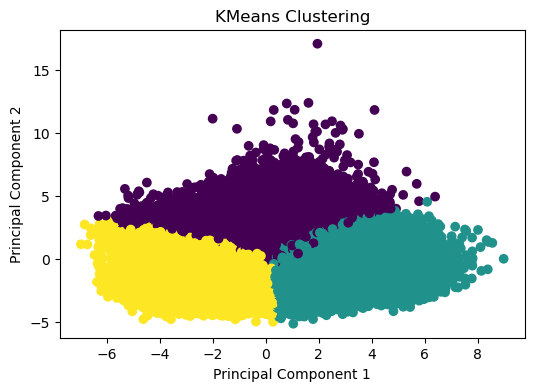

Shape of Encoded Data: (145460, 93)
Shape of cluster centers: (3, 14)


In [35]:
# Visualize Cluster
# For visualization, we select two principal components using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_dataframe = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_dataframe['Cluster'] = cluster_labels

plt.scatter(principal_dataframe['PC1'], principal_dataframe['PC2'], c=principal_dataframe['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.show()
# Shape of Encoded Data
encoded_features_shape = encoded_features.shape
print("Shape of Encoded Data:", encoded_features_shape)

# Shape of cluster centers
cluster_centers_shape = kmeans.cluster_centers_.shape
print("Shape of cluster centers:", cluster_centers_shape)


This code segment provides a summary of the distribution of data points across the clusters, indicating the number of data points assigned to each cluster by the KMeans algorithm.The output indicates the distribution of data points across the clusters generated by the KMeans clustering algorithm. Each cluster is labeled numerically, starting from 0, and the count of data points within each cluster is provided. In this particular case, Cluster 0 contains 35,581 data points, Cluster 1 contains 51,877 data points, and Cluster 2 contains 58,002 data points.

In [36]:
from collections import Counter
# Count the number of data points in each cluster
cluster_counts = Counter(cluster_labels)
# Print the number of data points in each cluster
for cluster_num, count in cluster_counts.items():
    print(f"Cluster {cluster_num}: {count} data points")

Cluster 0: 35581 data points
Cluster 1: 51877 data points
Cluster 2: 58002 data points


### Conclusion

In this project, various machine learning techniques were employed to analyze weather data and predict whether it will rain tomorrow. The project began with data preprocessing steps, including handling missing values and feature scaling. Exploratory data analysis provided insights into the distribution and relationships among different weather variables. Subsequently, predictive modeling was conducted using both KMeans clustering and Random Forest classification algorithms. KMeans clustering facilitated the identification of distinct weather patterns, while Random Forest classification offered accurate predictions regarding future rainfall based on historical weather data. Through model evaluation and performance analysis, the effectiveness of the predictive models was assessed, providing valuable insights into weather forecasting applications. Overall, this project demonstrates the application of machine learning techniques in weather prediction, showcasing their potential to enhance decision-making processes in various domains reliant on weather forecasting.